# 7조 미니 프로젝트_ 웹 & API 크롤링 데이터 분석

In [4]:
import urllib.request   # 사이트 자료 요청 
import json               # json 자료 데이터 핸들링 
import pandas as pd       # DataFrame 자료형 활용
from pandas.io.json import json_normalize     # json 데이터를 pandas DataFrame 으로 변환 

## [주제] 수도권 인천 매립지 이슈(2025년 종료) 관련 쓰레기 배출 현황 분석 
          " 우리집의 쓰레기가 수거되지 않는다면??? "

신문기사: https://www.kukinews.com/newsView/kuk202209150155

      "서울 쓰레기 대란이 임박했다. 인천 수도권 매립장은 포화상태에 다다랐고, 마포구 소각장 신설은 주민의 격한 반대에 직면했다. 
      각 자치구가 폐기물 처리 책임을 회피할 경우 ‘쓰레기 전쟁’이 본격화할 것으로 보인다."

- 이슈: 2021년 폐기물 관리법 시행규칙 공포

       - 수도권 지자체는 2026년부터 생활폐기물을 매립지에 묻는 대신 선별해 재활용 하거나 소각장 처리해야 함

- 이슈2: 2025년까지 인천 쓰레기 매립지 종료 = 서울, 경기 쓰레기 반입 불가 

       - 인천 제3쓰레기 매립지 (시작: 2018.10 ~)



- 매립지로 가는 쓰레기 폐기물 : 생활, 건설, 사업장 (건설 폐기물 매립 조기 종료)

> 선정이유

- 쓰레기 대란의 문제해결은 공공의 영역이어야 해결할 수 있음 : https://www.hani.co.kr/arti/society/environment/838851.html (민간업체 쓰레기 거부사태)
- 갈수록 부각되는 환경이슈 
- 서울과 경기도내 거주하는 모든 사람들에게 당면한 문제 - '곧 옵니다'

## [팀원소개]

- 김가람 : 사업장폐기물 데이터 수집 및 전처리, 데이터 분석
- 이승민 : 생활폐기물 데이터 수집 및 전처리, 데이터 분석 
- 정원조 : 건설폐기물 데이터 수집 및 전처리, 데이터 분석


## [목적]

- 데이터 분석을 통해 '수도권 쓰레기 대란' 문제의 실제적 접근 및 공론화

### -자료 수집-
#### 자원순환정보시스템 - 통계 open API - 폐기물 통계 정보 서비스 

- https://www.recycling-info.or.kr/sds/ntnProcessIndex.do?menuNo=M130309

#### 수도권매립지 관리공사 - 매립지 정보

- https://www.slc.or.kr/slc/mb/sl/landfillStat.do?tabNo=0&#/eyJwYWdlIjoxLCJ3ZWJQYWdlTm8iOiIyMDQiLCJ0YWJObyI6MH0=

- 기준연도: 2018년, 2019년, 2020년

api 코드 정보 = PID: NTN007 생활쓰레기 데이터 

#### 1. 데이터 수집

In [429]:
# # 폐기물 배출량 집계
# pid = 'NTN007' 
# year = '2018'
# usrid = 'gnjnme0'
# key = "IPRI8CHMR3GLD9C80L7LO7WRI80SZSB6Y2ERNPYDP2FW8"   # 내가 발급 받은 키
        

# url = "http://www.recycling-info.or.kr/sds/JsonApi.do?PID=%s&YEAR=%s&USRID=%s&KEY=%s" % (pid, year, usrid, key)

# url

'http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN007&YEAR=2018&USRID=gnjnme0&KEY=IPRI8CHMR3GLD9C80L7LO7WRI80SZSB6Y2ERNPYDP2FW8'

In [5]:
# 도시별 인구수 집계
pid = 'NTN001' 
year = '2020'
usrid = 'gnjnme0'
key = "IPRI8CHMR3GLD9C80L7LO7WRI80SZSB6Y2ERNPYDP2FW8"   # 내가 발급 받은 키
        

url = "http://www.recycling-info.or.kr/sds/JsonApi.do?PID=%s&YEAR=%s&USRID=%s&KEY=%s" % (pid, year, usrid, key)

url

'http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN001&YEAR=2020&USRID=gnjnme0&KEY=IPRI8CHMR3GLD9C80L7LO7WRI80SZSB6Y2ERNPYDP2FW8'

In [197]:
# # url 변하는 내용을 자동 반복해서 넣어주기 

# url_1 = 'http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN004&YEAR='
# url_2 = '&USRID=gnjnme0&KEY=IPRI8CHMR3GLD9C80L7LO7WRI80SZSB6Y2ERNPYDP2FW8'
# # url_1 + url_2 
# url_year = ['2019','2020']
# for i in url_year:
#     url_sum = url_1+str(i)+url_2
#     print(url_sum) 

http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN004&YEAR=2019&USRID=gnjnme0&KEY=IPRI8CHMR3GLD9C80L7LO7WRI80SZSB6Y2ERNPYDP2FW8
http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN004&YEAR=2020&USRID=gnjnme0&KEY=IPRI8CHMR3GLD9C80L7LO7WRI80SZSB6Y2ERNPYDP2FW8


#### 2. 데이터 내부로 들어가기

In [6]:
# 위에 선언해둔 url 을 이용해 api 데이터 파이썬 내부로 가져오기 
# result = urllib.request.urlopen(url)
result = urllib.request.urlopen(url)

In [7]:
# 요청 페이지의 결과 데이터를 파이썬 변수에 저장 
json_data_raw = result.read() 

In [8]:
json_data_raw

b'{"data":[{"CITY_JIDT_CD_NM":"\xec\xa0\x84\xea\xb5\xad","TOT_AREA":100458.33,"TOT_POP":52942262,"TOT_DONG":3501,"TOT_HSHLD":23093108,"LIFEWT_MNG_AREA":99905.51,"LIFEWT_MNG_POP":52920946,"LIFEWT_MNG_DONG":3499,"LIFEWT_MNG_HSHLD":23081100,"LIFEWT_MNGEXCPT_AREA":552.82,"LIFEWT_MNGEXCPT_POP":21316,"LIFEWT_MNGEXCPT_DONG":2,"LIFEWT_MNGEXCPT_HSHLD":12008,"MNGEXCPT_AREA_RATIO":0.6,"MNGEXCPT_POP_RATIO":0,"MNGEXCPT_DONG_RATIO":0.1,"MNGEXCPT_HSHLD_RATIO":0.1},{"CITY_JIDT_CD_NM":"\xec\x84\x9c\xec\x9a\xb8","TOT_AREA":605.24,"TOT_POP":9911088,"TOT_DONG":425,"TOT_HSHLD":4417954,"LIFEWT_MNG_AREA":605.24,"LIFEWT_MNG_POP":9911088,"LIFEWT_MNG_DONG":425,"LIFEWT_MNG_HSHLD":4417954,"LIFEWT_MNGEXCPT_AREA":0,"LIFEWT_MNGEXCPT_POP":0,"LIFEWT_MNGEXCPT_DONG":0,"LIFEWT_MNGEXCPT_HSHLD":0,"MNGEXCPT_AREA_RATIO":0,"MNGEXCPT_POP_RATIO":0,"MNGEXCPT_DONG_RATIO":0,"MNGEXCPT_HSHLD_RATIO":0},{"CITY_JIDT_CD_NM":"\xeb\xb6\x80\xec\x82\xb0","TOT_AREA":770.08,"TOT_POP":3432312,"TOT_DONG":205,"TOT_HSHLD":1530431,"LIFEWT_MNG_AREA

In [9]:
type(json_data_raw)

bytes

In [10]:
json_utf8 = json_data_raw.decode('utf-8') 

In [11]:
json_utf8

'{"data":[{"CITY_JIDT_CD_NM":"전국","TOT_AREA":100458.33,"TOT_POP":52942262,"TOT_DONG":3501,"TOT_HSHLD":23093108,"LIFEWT_MNG_AREA":99905.51,"LIFEWT_MNG_POP":52920946,"LIFEWT_MNG_DONG":3499,"LIFEWT_MNG_HSHLD":23081100,"LIFEWT_MNGEXCPT_AREA":552.82,"LIFEWT_MNGEXCPT_POP":21316,"LIFEWT_MNGEXCPT_DONG":2,"LIFEWT_MNGEXCPT_HSHLD":12008,"MNGEXCPT_AREA_RATIO":0.6,"MNGEXCPT_POP_RATIO":0,"MNGEXCPT_DONG_RATIO":0.1,"MNGEXCPT_HSHLD_RATIO":0.1},{"CITY_JIDT_CD_NM":"서울","TOT_AREA":605.24,"TOT_POP":9911088,"TOT_DONG":425,"TOT_HSHLD":4417954,"LIFEWT_MNG_AREA":605.24,"LIFEWT_MNG_POP":9911088,"LIFEWT_MNG_DONG":425,"LIFEWT_MNG_HSHLD":4417954,"LIFEWT_MNGEXCPT_AREA":0,"LIFEWT_MNGEXCPT_POP":0,"LIFEWT_MNGEXCPT_DONG":0,"LIFEWT_MNGEXCPT_HSHLD":0,"MNGEXCPT_AREA_RATIO":0,"MNGEXCPT_POP_RATIO":0,"MNGEXCPT_DONG_RATIO":0,"MNGEXCPT_HSHLD_RATIO":0},{"CITY_JIDT_CD_NM":"부산","TOT_AREA":770.08,"TOT_POP":3432312,"TOT_DONG":205,"TOT_HSHLD":1530431,"LIFEWT_MNG_AREA":770.08,"LIFEWT_MNG_POP":3432312,"LIFEWT_MNG_DONG":205,"LIFEWT_MNG

In [12]:
type(json_utf8) 

str

In [13]:
# str을 dict 로 변환하기 위해 json.loads(자료) 활용 
# 딕셔너리 형태의 문자열을 딕셔너리로 변환 
json_dic = json.loads(json_utf8)

In [14]:
# 실제 원하는 데이터가 있는 'data' 만 추출
json_dic_call = json_dic['data']

In [15]:
json_dic_call

[{'CITY_JIDT_CD_NM': '전국',
  'TOT_AREA': 100458.33,
  'TOT_POP': 52942262,
  'TOT_DONG': 3501,
  'TOT_HSHLD': 23093108,
  'LIFEWT_MNG_AREA': 99905.51,
  'LIFEWT_MNG_POP': 52920946,
  'LIFEWT_MNG_DONG': 3499,
  'LIFEWT_MNG_HSHLD': 23081100,
  'LIFEWT_MNGEXCPT_AREA': 552.82,
  'LIFEWT_MNGEXCPT_POP': 21316,
  'LIFEWT_MNGEXCPT_DONG': 2,
  'LIFEWT_MNGEXCPT_HSHLD': 12008,
  'MNGEXCPT_AREA_RATIO': 0.6,
  'MNGEXCPT_POP_RATIO': 0,
  'MNGEXCPT_DONG_RATIO': 0.1,
  'MNGEXCPT_HSHLD_RATIO': 0.1},
 {'CITY_JIDT_CD_NM': '서울',
  'TOT_AREA': 605.24,
  'TOT_POP': 9911088,
  'TOT_DONG': 425,
  'TOT_HSHLD': 4417954,
  'LIFEWT_MNG_AREA': 605.24,
  'LIFEWT_MNG_POP': 9911088,
  'LIFEWT_MNG_DONG': 425,
  'LIFEWT_MNG_HSHLD': 4417954,
  'LIFEWT_MNGEXCPT_AREA': 0,
  'LIFEWT_MNGEXCPT_POP': 0,
  'LIFEWT_MNGEXCPT_DONG': 0,
  'LIFEWT_MNGEXCPT_HSHLD': 0,
  'MNGEXCPT_AREA_RATIO': 0,
  'MNGEXCPT_POP_RATIO': 0,
  'MNGEXCPT_DONG_RATIO': 0,
  'MNGEXCPT_HSHLD_RATIO': 0},
 {'CITY_JIDT_CD_NM': '부산',
  'TOT_AREA': 770.08,
  'TO

In [16]:
# 인구 데이터 데이터프레임 만들기 
df_p = pd.DataFrame(json_dic_call)

In [17]:
df_p

,CITY_JIDT_CD_NM,TOT_AREA,TOT_POP,TOT_DONG,TOT_HSHLD,LIFEWT_MNG_AREA,LIFEWT_MNG_POP,LIFEWT_MNG_DONG,LIFEWT_MNG_HSHLD,LIFEWT_MNGEXCPT_AREA,LIFEWT_MNGEXCPT_POP,LIFEWT_MNGEXCPT_DONG,LIFEWT_MNGEXCPT_HSHLD,MNGEXCPT_AREA_RATIO,MNGEXCPT_POP_RATIO,MNGEXCPT_DONG_RATIO,MNGEXCPT_HSHLD_RATIO
0,전국,100458.33,52942262,3501,23093108,99905.51,52920946,3499,23081100,552.82,21316,2,12008,0.6,0.0,0.1,0.1
1,서울,605.24,9911088,425,4417954,605.24,9911088,425,4417954,0.00,0,0,0,0.0,0.0,0.0,0.0
2,부산,770.08,3432312,205,1530431,770.08,3432312,205,1530431,0.00,0,0,0,0.0,0.0,0.0,0.0
3,대구,883.50,2446144,141,1056627,883.50,2446144,141,1056627,0.00,0,0,0,0.0,0.0,0.0,0.0
4,인천,1063.99,3010476,155,1267956,1046.71,3009561,155,1267402,17.28,915,0,554,1.6,0.0,0.0,0.0
5,광주,501.12,1471385,96,633582,501.12,1471385,96,633582,0.00,0,0,0,0.0,0.0,0.0,0.0
6,대전,539.66,1480777,79,652783,539.66,1480777,79,652783,0.00,0,0,0,0.0,0.0,0.0,0.0
7,울산,1062.08,1153901,56,476893,1062.08,1153901,56,476893,0.00,0,0,0,0.0,0.0,0.0,0.0
8,세종,464.91,360907,20,144275,464.91,360907,20,144275,0.00,0,0,0,0.0,0.0,0.0,0.0
9,경기,10195.27,13774748,551,5676401,10195.27,13774748,551,5676401,0.00,0,0,0,0.0,0.0,0.0,0.0


#### 3. 데이터(데이터프레임) 분석 및 전처리 & 파생변수 생성

##### 시도 = CITY_JIDT_NM / 총계 = TOT_SUM_QTY, WSTE_QTY / 매립 = TOT_FILL_QTY / 소각 = TOT_INCI_QTY / 재활용 = TOT_RECY_QTY

##### 인구집계 - 시도 = CITY_JIDT_CD_NM  , 면적 - TOT_AREA, 인구수 - TOT_POP

In [18]:
df_p.columns

Index(['CITY_JIDT_CD_NM', 'TOT_AREA', 'TOT_POP', 'TOT_DONG', 'TOT_HSHLD',
       'LIFEWT_MNG_AREA', 'LIFEWT_MNG_POP', 'LIFEWT_MNG_DONG',
       'LIFEWT_MNG_HSHLD', 'LIFEWT_MNGEXCPT_AREA', 'LIFEWT_MNGEXCPT_POP',
       'LIFEWT_MNGEXCPT_DONG', 'LIFEWT_MNGEXCPT_HSHLD', 'MNGEXCPT_AREA_RATIO',
       'MNGEXCPT_POP_RATIO', 'MNGEXCPT_DONG_RATIO', 'MNGEXCPT_HSHLD_RATIO'],
      dtype='object')

In [19]:
# 2020 인구 데이터에서 시도, 면적, 인구수만 남기기

df_p.drop(df_p[['TOT_DONG', 'TOT_HSHLD',
       'LIFEWT_MNG_AREA', 'LIFEWT_MNG_POP', 'LIFEWT_MNG_DONG',
       'LIFEWT_MNG_HSHLD', 'LIFEWT_MNGEXCPT_AREA', 'LIFEWT_MNGEXCPT_POP',
       'LIFEWT_MNGEXCPT_DONG', 'LIFEWT_MNGEXCPT_HSHLD', 'MNGEXCPT_AREA_RATIO',
       'MNGEXCPT_POP_RATIO', 'MNGEXCPT_DONG_RATIO', 'MNGEXCPT_HSHLD_RATIO']], axis = 1, inplace = True)

In [410]:
# # 2018 데이터에서 시도, 총계, 매립계, 소각계, 재활용계 컬럼만 남기기 

# df2020.drop(df2020[['WT_TYPE_GB_NM', 'WSTE_M_CODE_NM', 'WSTE_CODE_NM',
#        'TOT_ETC_QTY', 'PUB_RECY_QTY', 'PUB_INCI_QTY', 'PUB_FILL_QTY',
#        'PUB_ETC_QTY', 'SELF_RECY_QTY', 'SELF_INCI_QTY', 'SELF_FILL_QTY',
#        'SELF_ETC_QTY', 'COM_RECY_QTY', 'COM_INCI_QTY', 'COM_FILL_QTY',
#        'COM_ETC_QTY']], axis = 1, inplace = True)

In [20]:
# 인구 데이터 
df_p

,CITY_JIDT_CD_NM,TOT_AREA,TOT_POP
0,전국,100458.33,52942262
1,서울,605.24,9911088
2,부산,770.08,3432312
3,대구,883.50,2446144
4,인천,1063.99,3010476
5,광주,501.12,1471385
6,대전,539.66,1480777
7,울산,1062.08,1153901
8,세종,464.91,360907
9,경기,10195.27,13774748


In [21]:
# df 에서 서울, 경기, 인천 만 추출하기

df_p = df_p[(df_p['CITY_JIDT_CD_NM'] == '서울') | (df_p['CITY_JIDT_CD_NM'] == '경기') | (df_p['CITY_JIDT_CD_NM'] == '인천')]

In [447]:
# 컬럼 순서 변경하기

# df_p = df_p[['CITY_JIDT_CD_NM','TOT_AREA','TOT_POP']]

In [53]:
df_p

,도시,면적,인구
1,서울,605.24,9911088
4,인천,1063.99,3010476
9,경기,10195.27,13774748


In [449]:
# 생활 폐기물 도시명을 기준으로 .groupby().sum()
# df2018_s = df2018.groupby('CITY_JIDT_NM').sum() 

In [21]:
# df2018_s

In [54]:
# 컬럼이름 한글로 변환
df_p1 = df_p.rename(columns={'CITY_JIDT_CD_NM':'도시', 'TOT_AREA':'면적','TOT_POP':'인구'})

In [55]:
df_p1.dtypes

도시     object
면적    float64
인구      int64
dtype: object

In [50]:
# 행 순서도 다시 정렬, 행 인덱스 이름 부여
# df_p1 = df_p.reindex(['서울','경기','인천'], axis = 0)
# df_p.index.name = '도시'

In [56]:
df_p1

,도시,면적,인구
1,서울,605.24,9911088
4,인천,1063.99,3010476
9,경기,10195.27,13774748


#### 4. 생활폐기물 데이터 분석 및 파생변수 

In [455]:
# 총계를 매립 + 소각 + 재활용 값으로 계산하게 함

df2018_s.loc['서울']['총계'] = df2018_s.loc['서울']['매립'] + df2018_s.loc['서울']['소각'] + df2018_s.loc['서울']['재활용']

df2018_s.loc['인천']['총계'] = df2018_s.loc['인천']['매립'] + df2018_s.loc['인천']['소각'] + df2018_s.loc['인천']['재활용']

df2018_s.loc['경기']['총계'] = df2018_s.loc['경기']['매립'] + df2018_s.loc['경기']['소각'] + df2018_s.loc['경기']['재활용']

In [390]:
# # 실제 데이터로 값 수정 > 실데이터와 api 데이터 오류 발견 > 엑셀자료도 다운로드 된 자료가 이상하게 됨

# df2020_s.loc['서울']['매립'] = 946.72
# df2020_s.loc['서울']['소각'] = 2185.66
# df2020_s.loc['서울']['재활용'] = 5572.49
# df2020_s.loc['서울']['총계'] = df2020_s.loc['서울']['매립'] + df2020_s.loc['서울']['소각'] + df2020_s.loc['서울']['재활용']
# df2020_s.loc['인천']['매립'] = 309.21
# df2020_s.loc['인천']['소각'] = 601.73
# df2020_s.loc['인천']['재활용'] = 929.72
# df2020_s.loc['인천']['총계'] = df2020_s.loc['인천']['매립'] + df2020_s.loc['인천']['소각'] + df2020_s.loc['인천']['재활용']
# df2020_s.loc['경기']['매립'] = 931.98
# df2020_s.loc['경기']['소각'] = 3851.90
# df2020_s.loc['경기']['재활용'] = 5865.72
# df2020_s.loc['경기']['총계'] = df2020_s.loc['경기']['매립'] + df2020_s.loc['경기']['소각'] + df2020_s.loc['경기']['재활용']


In [456]:
# 매립, 소각, 재활용의 비중(%) 계산 및 컬럼(파생변수) 삽입

df2018_s['매립비중(%)'] = round((df2018_s['매립'] / df2018_s['총계']) * 100, 1)
df2018_s['소각비중(%)'] = round((df2018_s['소각'] / df2018_s['총계']) * 100, 1)
df2018_s['재활용비중(%)'] = round((df2018_s['재활용'] / df2018_s['총계']) * 100, 1)
df2018_s

,매립,소각,재활용,총계,매립비중(%),소각비중(%),재활용비중(%)
도시,,,,,,,
서울,839.9,2020.5,5726.5,8586.9,9.8,23.5,66.7
경기,847.2,3612.9,5401.2,9861.3,8.6,36.6,54.8
인천,293.3,584.1,1107.7,1985.1,14.8,29.4,55.8


In [457]:
# 컬럼 위치 변경
# 매립비중이 인천이 높은이유 : 매립지가 인천에 위치 > 매립에 좀 더 자유로운 조건

df2018_s = df2018_s[['매립', '매립비중(%)', '소각', '소각비중(%)','재활용','재활용비중(%)','총계']]
df2018_s

,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
도시,,,,,,,
서울,839.9,9.8,2020.5,23.5,5726.5,66.7,8586.9
경기,847.2,8.6,3612.9,36.6,5401.2,54.8,9861.3
인천,293.3,14.8,584.1,29.4,1107.7,55.8,1985.1


In [458]:
# 연도별 df 데이터 csv 파일로 내보내기 (2019, 2020년)
df2018_s.to_csv('df2018.csv')

In [57]:
# 인구데이터 csv 파일로 내보내기 
df_p1.to_csv('df_people.csv')

#### 5. 생활 데이터 연도별(2018-2020) 불러오기 및 합치기 

In [68]:
# 2018년 수도권 1일 생활쓰레기 배출량
df1 = pd.read_csv('./df2018.csv')
df1

,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
0,서울,839.9,9.8,2020.5,23.5,5726.5,66.7,8586.9
1,경기,847.2,8.6,3612.9,36.6,5401.2,54.8,9861.3
2,인천,293.3,14.8,584.1,29.4,1107.7,55.8,1985.1


In [177]:
df1.dtypes

도시           object
매립          float64
매립비중(%)     float64
소각          float64
소각비중(%)     float64
재활용         float64
재활용비중(%)    float64
총계          float64
dtype: object

In [69]:
# df.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False) 
# 도시명을 새로운 인덱스로
df1.set_index('도시', inplace = True)

In [70]:
df1

,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
도시,,,,,,,
서울,839.9,9.8,2020.5,23.5,5726.5,66.7,8586.9
경기,847.2,8.6,3612.9,36.6,5401.2,54.8,9861.3
인천,293.3,14.8,584.1,29.4,1107.7,55.8,1985.1


In [71]:
df1[['매립','소각','재활용']].sum(axis = 0) 

매립      1980.4
소각      6217.5
재활용    12235.4
dtype: float64

In [72]:
# df2.loc["ColTotal", :] = df2.sum() 
df1.loc["2018소계", :] = df1[['매립','소각','재활용', '총계']].sum() 

In [73]:
df1

,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
도시,,,,,,,
서울,839.9,9.8,2020.5,23.5,5726.5,66.7,8586.9
경기,847.2,8.6,3612.9,36.6,5401.2,54.8,9861.3
인천,293.3,14.8,584.1,29.4,1107.7,55.8,1985.1
2018소계,1980.4,NaN,6217.5,NaN,12235.4,NaN,20433.3


In [74]:
# 2018년 컬럼별 2018소계 및 비중
df1.loc[('2018소계', '매립비중(%)')] = round(df1.loc['2018소계']['매립'] / df1.loc['2018소계']['총계'] * 100, 2)
df1.loc[('2018소계', '소각비중(%)')] = round(df1.loc['2018소계']['소각'] / df1.loc['2018소계']['총계'] * 100, 2)
df1.loc[('2018소계', '재활용비중(%)')] = round(df1.loc['2018소계']['재활용'] / df1.loc['2018소계']['총계'] * 100, 2)

In [75]:
df1

,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
도시,,,,,,,
서울,839.9,9.80,2020.5,23.50,5726.5,66.70,8586.9
경기,847.2,8.60,3612.9,36.60,5401.2,54.80,9861.3
인천,293.3,14.80,584.1,29.40,1107.7,55.80,1985.1
2018소계,1980.4,9.69,6217.5,30.43,12235.4,59.88,20433.3


In [76]:
# 각 df 별로 연도 컬럼 추가 및 연도 기재
df1['연도'] = 2018
df1

,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계,연도
도시,,,,,,,,
서울,839.9,9.80,2020.5,23.50,5726.5,66.70,8586.9,2018
경기,847.2,8.60,3612.9,36.60,5401.2,54.80,9861.3,2018
인천,293.3,14.80,584.1,29.40,1107.7,55.80,1985.1,2018
2018소계,1980.4,9.69,6217.5,30.43,12235.4,59.88,20433.3,2018


In [77]:
# 인덱스를 다시 리셋하기 
df1.reset_index(inplace = True)

In [78]:
# 2019년 수도권 생활쓰레기 배출량
df2 = pd.read_csv('./df2019_1.csv')
df2

,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
0,서울,970.22,11.2,2164.71,25.0,5514.07,63.8,8649.00
1,경기,934.36,9.8,3627.18,38.1,4947.47,52.0,9509.01
2,인천,338.33,17.7,516.70,27.0,1059.22,55.3,1914.25


In [130]:
df2.dtypes

도시           object
매립          float64
매립비중(%)     float64
소각          float64
소각비중(%)     float64
재활용         float64
재활용비중(%)    float64
총계          float64
연도            int64
dtype: object

In [79]:
# df.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False) 
# 도시명을 새로운 인덱스로
df2.set_index('도시', inplace = True)

In [80]:
df2[['매립','소각','재활용']].sum(axis = 0) 

매립      2242.91
소각      6308.59
재활용    11520.76
dtype: float64

In [81]:
# df2.loc["ColTotal", :] = df2.sum() 
df2.loc["2019소계", :] = df2[['매립','소각','재활용', '총계']].sum() 

In [82]:
# 2019년 컬럼별 2019소계 및 비중
df2.loc[('2019소계', '매립비중(%)')] = round(df2.loc['2019소계']['매립'] / df2.loc['2019소계']['총계'] * 100, 2)
df2.loc[('2019소계', '소각비중(%)')] = round(df2.loc['2019소계']['소각'] / df2.loc['2019소계']['총계'] * 100, 2)
df2.loc[('2019소계', '재활용비중(%)')] = round(df2.loc['2019소계']['재활용'] / df2.loc['2019소계']['총계'] * 100, 2)

In [83]:
df2

,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
도시,,,,,,,
서울,970.22,11.20,2164.71,25.00,5514.07,63.8,8649.00
경기,934.36,9.80,3627.18,38.10,4947.47,52.0,9509.01
인천,338.33,17.70,516.70,27.00,1059.22,55.3,1914.25
2019소계,2242.91,11.17,6308.59,31.43,11520.76,57.4,20072.26


In [84]:
# 각 df 별로 연도 컬럼 추가 및 연도 기재
df2['연도'] = 2019
df2

,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계,연도
도시,,,,,,,,
서울,970.22,11.20,2164.71,25.00,5514.07,63.8,8649.00,2019
경기,934.36,9.80,3627.18,38.10,4947.47,52.0,9509.01,2019
인천,338.33,17.70,516.70,27.00,1059.22,55.3,1914.25,2019
2019소계,2242.91,11.17,6308.59,31.43,11520.76,57.4,20072.26,2019


In [85]:
df2.reset_index(inplace = True)

In [86]:
# 2020년 수도권 생활쓰레기 배출량
df3 = pd.read_csv('./df2020.csv')
df3

,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
0,서울,946.72,10.9,2185.66,25.1,5572.49,64.0,8704.87
1,경기,931.98,8.8,3851.90,36.2,5865.72,55.1,10649.60
2,인천,309.21,16.8,601.73,32.7,929.72,50.5,1840.66


In [87]:
# df.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False) 
# 도시명을 새로운 인덱스로
df3.set_index('도시', inplace = True)

In [88]:
df3[['매립','소각','재활용']].sum(axis = 0) 

매립      2187.91
소각      6639.29
재활용    12367.93
dtype: float64

In [89]:
# df3.loc["ColTotal", :] = df3.sum() 
df3.loc["2019소계", :] = df3[['매립','소각','재활용', '총계']].sum() 

In [90]:
# 2020년 컬럼별 2019소계 및 비중
df3.loc[('2019소계', '매립비중(%)')] = round(df3.loc['2019소계']['매립'] / df3.loc['2019소계']['총계'] * 100, 2)
df3.loc[('2019소계', '소각비중(%)')] = round(df3.loc['2019소계']['소각'] / df3.loc['2019소계']['총계'] * 100, 2)
df3.loc[('2019소계', '재활용비중(%)')] = round(df3.loc['2019소계']['재활용'] / df3.loc['2019소계']['총계'] * 100, 2)

In [91]:
# 각 df 별로 연도 컬럼 추가 및 연도 기재
df3['연도'] = 2020
df3

,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계,연도
도시,,,,,,,,
서울,946.72,10.90,2185.66,25.10,5572.49,64.00,8704.87,2020
경기,931.98,8.80,3851.90,36.20,5865.72,55.10,10649.60,2020
인천,309.21,16.80,601.73,32.70,929.72,50.50,1840.66,2020
2019소계,2187.91,10.32,6639.29,31.32,12367.93,58.35,21195.13,2020


In [92]:
df3.reset_index(inplace = True)

In [93]:
# 인구데이터 불러오기 
df_peo = pd.read_csv('./df_people.csv')
df_peo

,Unnamed: 0,도시,면적,인구
0,1,서울,605.24,9911088
1,4,인천,1063.99,3010476
2,9,경기,10195.27,13774748


In [94]:
# 인구데이터 불필요한 컬럼 삭제 
df_peo.drop(df_peo[['Unnamed: 0']], axis = 1, inplace = True) 

In [362]:
df_peo

,도시,면적,인구
0,서울,605.24,9911088
1,인천,1063.99,3010476
2,경기,10195.27,13774748


In [369]:
# 수도권 전체 인구
df_all = round(df_peo['인구'].sum() / 10000, 2) 

In [370]:
df_all

2669.63

In [353]:
# 인천시 인구만 추출
df_inc = round(df_peo.loc[1]['인구'] / 10000, 2)

In [371]:
# 서울, 경기도 인구 계산
df_sk = df_all - df_inc  

In [372]:
# 서울, 경기도 인구(만명)
df_sk

2368.58

In [96]:
# 3개의 df concat으로 합치기 
df = pd.concat([df1, df2, df3], axis = 0)

In [261]:
df

,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계,연도
0,서울,839.90,9.80,2020.50,23.50,5726.50,66.70,8586.90,2018
1,경기,847.20,8.60,3612.90,36.60,5401.20,54.80,9861.30,2018
2,인천,293.30,14.80,584.10,29.40,1107.70,55.80,1985.10,2018
3,2018소계,1980.40,9.69,6217.50,30.43,12235.40,59.88,20433.30,2018
0,서울,970.22,11.20,2164.71,25.00,5514.07,63.80,8649.00,2019
1,경기,934.36,9.80,3627.18,38.10,4947.47,52.00,9509.01,2019
2,인천,338.33,17.70,516.70,27.00,1059.22,55.30,1914.25,2019
3,2019소계,2242.91,11.17,6308.59,31.43,11520.76,57.40,20072.26,2019
0,서울,946.72,10.90,2185.66,25.10,5572.49,64.00,8704.87,2020
1,경기,931.98,8.80,3851.90,36.20,5865.72,55.10,10649.60,2020


In [97]:
# 컬럼 중에 연도를 제일 앞으로 위치 변경 
df = df[['연도','도시','매립','매립비중(%)','소각','소각비중(%)', '재활용','재활용비중(%)','총계']]
df

,연도,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
0,2018,서울,839.90,9.80,2020.50,23.50,5726.50,66.70,8586.90
1,2018,경기,847.20,8.60,3612.90,36.60,5401.20,54.80,9861.30
2,2018,인천,293.30,14.80,584.10,29.40,1107.70,55.80,1985.10
3,2018,2018소계,1980.40,9.69,6217.50,30.43,12235.40,59.88,20433.30
0,2019,서울,970.22,11.20,2164.71,25.00,5514.07,63.80,8649.00
1,2019,경기,934.36,9.80,3627.18,38.10,4947.47,52.00,9509.01
2,2019,인천,338.33,17.70,516.70,27.00,1059.22,55.30,1914.25
3,2019,2019소계,2242.91,11.17,6308.59,31.43,11520.76,57.40,20072.26
0,2020,서울,946.72,10.90,2185.66,25.10,5572.49,64.00,8704.87
1,2020,경기,931.98,8.80,3851.90,36.20,5865.72,55.10,10649.60


In [98]:
# 서울데이터만 추출
df_s = df[(df['도시'] == '서울')] 
df_s

,연도,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
0,2018,서울,839.90,9.8,2020.50,23.5,5726.50,66.7,8586.90
0,2019,서울,970.22,11.2,2164.71,25.0,5514.07,63.8,8649.00
0,2020,서울,946.72,10.9,2185.66,25.1,5572.49,64.0,8704.87


#### 6. 각 도시별 1년 평균 배출량 데이터 구하기 

In [99]:
df_s['1년총계'] = df_s['총계'] * 365 
df_s['1년매립'] = df_s['매립'] * 365 

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\2834383727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['1년총계'] = df_s['총계'] * 365
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\2834383727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['1년매립'] = df_s['매립'] * 365


In [100]:
df_s

,연도,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계,1년총계,1년매립
0,2018,서울,839.90,9.8,2020.50,23.5,5726.50,66.7,8586.90,3134218.50,306563.5
0,2019,서울,970.22,11.2,2164.71,25.0,5514.07,63.8,8649.00,3156885.00,354130.3
0,2020,서울,946.72,10.9,2185.66,25.1,5572.49,64.0,8704.87,3177277.55,345552.8


In [116]:
# 서울시 생활폐기물 3년 평균
df_s_mean = round(df_s.groupby('도시')[['매립','소각','재활용','총계','1년총계','1년매립']].mean(), 2)

In [117]:
df_s_mean = df_s_mean.reset_index() 

In [118]:
# 서울시 1년 평균 데이터
df_s_mean

,도시,매립,소각,재활용,총계,1년총계,1년매립
0,서울,918.95,2123.62,5604.35,8646.92,3156127.02,335415.53


In [121]:
df_s_m = df_s_mean.rename(columns = {'1년총계':'1년평균'})

In [122]:
df_s_m

,도시,매립,소각,재활용,총계,1년평균,1년매립
0,서울,918.95,2123.62,5604.35,8646.92,3156127.02,335415.53


In [125]:
# 인천데이터만 추출
df_i = df[(df['도시'] == '인천')] 
df_i

,연도,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
2,2018,인천,293.30,14.8,584.10,29.4,1107.70,55.8,1985.10
2,2019,인천,338.33,17.7,516.70,27.0,1059.22,55.3,1914.25
2,2020,인천,309.21,16.8,601.73,32.7,929.72,50.5,1840.66


In [126]:
df_i['1년총계'] = df_i['총계'] * 365 
df_i['1년매립'] = df_i['매립'] * 365 

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\1498793066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['1년총계'] = df_i['총계'] * 365
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\1498793066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i['1년매립'] = df_i['매립'] * 365


In [127]:
df_i

,연도,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계,1년총계,1년매립
2,2018,인천,293.30,14.8,584.10,29.4,1107.70,55.8,1985.10,724561.50,107054.50
2,2019,인천,338.33,17.7,516.70,27.0,1059.22,55.3,1914.25,698701.25,123490.45
2,2020,인천,309.21,16.8,601.73,32.7,929.72,50.5,1840.66,671840.90,112861.65


In [128]:
# 인천시 생활폐기물 3년 평균
df_i_mean = round(df_i.groupby('도시')[['매립','소각','재활용','총계','1년총계','1년매립']].mean(), 2)

In [129]:
df_i_mean = df_i_mean.reset_index()

In [130]:
df_i_mean

,도시,매립,소각,재활용,총계,1년총계,1년매립
0,인천,313.61,567.51,1032.21,1913.34,698367.88,114468.87


In [131]:
df_i_m = df_i_mean.rename(columns = {'1년총계':'1년평균'})

In [132]:
df_i_m

,도시,매립,소각,재활용,총계,1년평균,1년매립
0,인천,313.61,567.51,1032.21,1913.34,698367.88,114468.87


In [133]:
# 경기 데이터만 추출
df_g = df[(df['도시'] == '경기')] 
df_g

,연도,도시,매립,매립비중(%),소각,소각비중(%),재활용,재활용비중(%),총계
1,2018,경기,847.20,8.6,3612.90,36.6,5401.20,54.8,9861.30
1,2019,경기,934.36,9.8,3627.18,38.1,4947.47,52.0,9509.01
1,2020,경기,931.98,8.8,3851.90,36.2,5865.72,55.1,10649.60


In [134]:
df_g['1년총계'] = df_g['총계'] * 365 
df_g['1년매립'] = df_g['매립'] * 365 

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\3203187594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g['1년총계'] = df_g['총계'] * 365
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\3203187594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g['1년매립'] = df_g['매립'] * 365


In [135]:
# 경기도 생활폐기물 3년 평균
df_g_mean = round(df_g.groupby('도시')[['매립','소각','재활용','총계','1년총계','1년매립']].mean(), 2)

In [136]:
df_g_mean = df_g_mean.reset_index()

In [137]:
df_g_m = df_g_mean.rename(columns = {'1년총계':'1년평균'})

In [138]:
df_g_m

,도시,매립,소각,재활용,총계,1년평균,1년매립
0,경기,904.51,3697.33,5404.8,10006.64,3652422.38,330147.37


In [197]:
# 지자체별 평균 배출량 합치기 
df_m = pd.concat([df_s_m, df_i_m, df_g_m], axis = 0)

In [198]:
# 행 label 이름 변경
df_m =df_m.set_axis(labels=[0,1,2],axis=0)

In [199]:
df_m

,도시,매립,소각,재활용,총계,1년평균,1년매립
0,서울,918.95,2123.62,5604.35,8646.92,3156127.02,335415.53
1,인천,313.61,567.51,1032.21,1913.34,698367.88,114468.87
2,경기,904.51,3697.33,5404.80,10006.64,3652422.38,330147.37


In [200]:
# 평균 데이터와 인구데이터 합치기 .join()
df_mp = df_m.join(df_peo.set_index('도시'),on='도시')

In [201]:
df_mp

,도시,매립,소각,재활용,총계,1년평균,1년매립,면적,인구
0,서울,918.95,2123.62,5604.35,8646.92,3156127.02,335415.53,605.24,9911088
1,인천,313.61,567.51,1032.21,1913.34,698367.88,114468.87,1063.99,3010476
2,경기,904.51,3697.33,5404.80,10006.64,3652422.38,330147.37,10195.27,13774748


#### 7. 1인당 배출량 구해보기 

In [202]:
# df_mp['인당배출량(일/kg)'] = df_mp.loc[0][['1년매입']] / df_mp.loc[0][['1년매립']]
df_mp['1인배출량(일/kg)'] = round(df_mp.apply(lambda x: (x['총계'] / x['인구']) * 1000, axis = 'columns'), 2)
df_mp['1인배출량(년/kg)'] = round(df_mp.apply(lambda x: (x['1년평균'] / x['인구']) * 1000, axis = 'columns'), 2)

df_mp['1인매립량(일/kg)'] = round(df_mp.apply(lambda x: (x['매립'] / x['인구']) * 1000, axis = 'columns'), 2)
df_mp['1인매립량(년/kg)'] = round(df_mp.apply(lambda x: (x['1년매립'] / x['인구']) * 1000, axis = 'columns'), 2)


In [209]:
df_mp

,도시,매립,소각,재활용,총계,1년평균,1년매립,면적,인구,1인배출량(일/kg),1인배출량(년/kg),1인매립량(일/kg),1인매립량(년/kg)
0,서울,918.95,2123.62,5604.35,8646.92,3156127.02,335415.53,605.24,9911088,0.87,318.44,0.09,33.84
1,인천,313.61,567.51,1032.21,1913.34,698367.88,114468.87,1063.99,3010476,0.64,231.98,0.10,38.02
2,경기,904.51,3697.33,5404.80,10006.64,3652422.38,330147.37,10195.27,13774748,0.73,265.15,0.07,23.97


#### 8. 수도권 생활 폐기물 매립량 구하기

In [211]:
# 1년 수도권 생활폐기물 매립량 계산 (만톤)
df_life = round(df_mp['1년매립'].sum() / 10000, 2) 
df_life

78.0

In [322]:
# 인천 1년 생활폐기물 매립량 추출
df_inlife = round(df_mp.loc[1]['1년매립'] / 10000, 2)

In [323]:
df_life2 = df_life - df_inlife

In [324]:
# 서울과 경기도 1년 평균 매립 배출량
df_life2

66.55

# 크롤링해서 웹페이지 매립지 정보 table 가져오기 

In [153]:
# 크롤링 작업을 위한 라이브러리 임포트
from bs4 import BeautifulSoup
from selenium import webdriver
from html_table_parser import parser_functions
import requests 

# # 코드 진행 지연을 위한 time 임포트
# import time

# # 2022년 이후 selenium 업데이트로 인한 xpath 추적시 임포트
# from selenium.webdriver.common.by import By

# import codecs

In [164]:
url = "https://www.slc.or.kr/slc/mb/sl/landfillStat.do?tabNo=0&#/eyJwYWdlIjoxLCJ3ZWJQYWdlTm8iOiIyMDQiLCJ0YWJObyI6MH0="
response = requests.get(url).text.encode('utf-8')
soup = BeautifulSoup(response, 'html.parser') 

data = soup.find("table", {'class' : 'table_style4'})

In [165]:
data

<table class="table_style4" summary="매립지 규모를 제1매립장, 제2매립장, 제3매립장, 제4매립장 기타 순으로 알려주고 있습니다.">
<caption>매립지 규모</caption>
<colgroup>
<col width="20%"/>
<col width="20%"/>
<col width="20%"/>
<col width="20%"/>
<col width="20%"/>
</colgroup>
<thead>
<tr>
<th scope="col">구 분</th>
<th scope="col">부지면적(만 m<sup>2</sup>)</th>
<th scope="col">매립면적(만m<sup>2</sup>)</th>
<th scope="col">매립용량(만톤)</th>
<th class="nobr" scope="col">기타</th>
</tr>
</thead>
<tbody>
<tr>
<td>제1매립장</td>
<td>409</td>
<td>251</td>
<td>6,425</td>
<td class="nobr">야생화단지</td>
</tr>
<tr>
<td>제2매립장</td>
<td>378</td>
<td>262</td>
<td>8,018</td>
<td class="nobr"></td>
</tr>
<tr>
<td>제3매립장(1단계)</td>
<td>103</td>
<td>83</td>
<td>1,819</td>
<td class="nobr"></td>
</tr>
<tr>
<td>제4매립장 등</td>
<td>593</td>
<td></td>
<td>6,538</td>
<td class="nobr">제3 매립장 잔여부지 포함</td>
</tr>
<tr>
<td>기 타(시설단지)</td>
<td>117</td>
<td>-</td>
<td>-</td>
<td class="nobr">제2공구등</td>
</tr>
<tr>
<td>총 계</td>
<td>1,600</td>
<td></td>
<td>22,800</td>
<td class="nobr">

In [168]:
# 컬럼헤더 분리 
thead = data.find_all('th')

thead_list = []

tlen = len(thead) 
for i in range(0, tlen):
    thead = data.find_all('th')[i].text 
    thead_list.append(thead)
thead_list

['구 분', '부지면적(만 m2)', '매립면적(만m2)', '매립용량(만톤)', '기타']

In [169]:
tbody = data.find('tbody')
tbody

<tbody>
<tr>
<td>제1매립장</td>
<td>409</td>
<td>251</td>
<td>6,425</td>
<td class="nobr">야생화단지</td>
</tr>
<tr>
<td>제2매립장</td>
<td>378</td>
<td>262</td>
<td>8,018</td>
<td class="nobr"></td>
</tr>
<tr>
<td>제3매립장(1단계)</td>
<td>103</td>
<td>83</td>
<td>1,819</td>
<td class="nobr"></td>
</tr>
<tr>
<td>제4매립장 등</td>
<td>593</td>
<td></td>
<td>6,538</td>
<td class="nobr">제3 매립장 잔여부지 포함</td>
</tr>
<tr>
<td>기 타(시설단지)</td>
<td>117</td>
<td>-</td>
<td>-</td>
<td class="nobr">제2공구등</td>
</tr>
<tr>
<td>총 계</td>
<td>1,600</td>
<td></td>
<td>22,800</td>
<td class="nobr"></td>
</tr>
</tbody>

In [170]:
trData = tbody.find_all("tr") 
trData 

[<tr>
 <td>제1매립장</td>
 <td>409</td>
 <td>251</td>
 <td>6,425</td>
 <td class="nobr">야생화단지</td>
 </tr>,
 <tr>
 <td>제2매립장</td>
 <td>378</td>
 <td>262</td>
 <td>8,018</td>
 <td class="nobr"></td>
 </tr>,
 <tr>
 <td>제3매립장(1단계)</td>
 <td>103</td>
 <td>83</td>
 <td>1,819</td>
 <td class="nobr"></td>
 </tr>,
 <tr>
 <td>제4매립장 등</td>
 <td>593</td>
 <td></td>
 <td>6,538</td>
 <td class="nobr">제3 매립장 잔여부지 포함</td>
 </tr>,
 <tr>
 <td>기 타(시설단지)</td>
 <td>117</td>
 <td>-</td>
 <td>-</td>
 <td class="nobr">제2공구등</td>
 </tr>,
 <tr>
 <td>총 계</td>
 <td>1,600</td>
 <td></td>
 <td>22,800</td>
 <td class="nobr"></td>
 </tr>]

In [171]:
tdData = trData[2].find_all('td')
tdData

[<td>제3매립장(1단계)</td>,
 <td>103</td>,
 <td>83</td>,
 <td>1,819</td>,
 <td class="nobr"></td>]

In [173]:
tdData[0].text

'제3매립장(1단계)'

In [175]:
rowlist = []
columnslist = [] 

trlen = len(trData) 
for d in range(0, trlen): 
    tdData = trData[d].find_all('td')
    
    tdlen = len(tdData) 
    for e in range(0, tdlen): 
        element = tdData[e].text 
        columnslist.append(element) 

    rowlist.append(columnslist) 
    columnslist = [] 
rowlist 

[['제1매립장', '409', '251', '6,425', '야생화단지'],
 ['제2매립장', '378', '262', '8,018', ''],
 ['제3매립장(1단계)', '103', '83', '1,819', ''],
 ['제4매립장 등', '593', '', '6,538', '제3 매립장 잔여부지 포함'],
 ['기 타(시설단지)', '117', '-', '-', '제2공구등'],
 ['총 계', '1,600', '', '22,800', '']]

In [244]:
# 매립지 정보 - 제 3 매립장
df_intake = pd.DataFrame(rowlist, columns = thead_list)
df_intake

,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),기타
0,제1매립장,409,251,"6,425",야생화단지
1,제2매립장,378,262,"8,018",
2,제3매립장(1단계),103,83,"1,819",
3,제4매립장 등,593,,"6,538",제3 매립장 잔여부지 포함
4,기 타(시설단지),117,-,-,제2공구등
5,총 계,"1,600",,"22,800",


In [326]:
# 제3매립장만 추출하기
df_intake3 = df_intake.loc[[2], :]
df_intake3

,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),기타
2,제3매립장(1단계),103,83,"1,819",


In [327]:
df_intake3.dtypes

구 분           object
부지면적(만 m2)    object
매립면적(만m2)     object
매립용량(만톤)      object
기타            object
dtype: object

In [328]:
# 문자열 타입 컬럼의 데이터 바꾸기 > 나중에 데이터 연산을 위함 > 컬럼을 빼준 이유는 나중에 숫자형 변경할 때 오류가 계속 나서 컬럼 빼줌
df_intake3['매립용량(만톤)'].replace('1,819', '1819', inplace = True)

In [329]:
df_intake3['매립용량(만톤)']

2    1819
Name: 매립용량(만톤), dtype: object

In [331]:
df_intake3['매립용량(만톤)'] = pd.to_numeric(df_intake3['매립용량(만톤)'])
df_intake3

,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),기타
2,제3매립장(1단계),103,83,1819,


In [332]:
# 기타 컬럼 삭제 
df_intake3.drop(df_intake3[['기타']], axis = 1, inplace = True)

##### 제3매립지 파생변수 생성

In [333]:
# 제3매립지에 이미 매립 완료된 생활폐기물 매립량 계산해서 컬럼 추가

df_intake3['생활매립(만톤)_완료'] = df_life * 4  
df_intake3

,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),생활매립(만톤)_완료
2,제3매립장(1단계),103,83,1819,312.0


# 건설폐기물, 사업장폐기물, 생활폐기물 수도권 데이터 취합 

In [334]:
# 건설배출량 데이터 불러오기 (정지원님)
df_cons = pd.read_excel('./건설폐기물_완성.xlsx')
df_cons

,도시,매립,소각,재활용,합계,1년평균,1년매립,면적,인구,1인배출량(일/kg),1인배출량(년/kg),1인매립량(일/kg),1인매립량(년/kg)
0,서울,2637.80,124.70,106511.60,109274.10,39885046.50,962797.00,605.24,9911088,11.03,4024.29,0.27,97.14
1,인천,379.17,234.17,43849.90,44463.23,16229080.17,138395.83,1063.99,3010476,14.77,5390.87,0.13,45.97
2,경기,1497.30,612.57,159461.03,161570.90,58973378.50,546514.50,10195.27,13774748,11.73,4281.27,0.11,39.68


In [335]:
# 건설폐기물 매립량만 가져오기 
df_cons = df_cons[['도시','1년매립']]

In [336]:
df_cons

,도시,1년매립
0,서울,962797.00
1,인천,138395.83
2,경기,546514.50


In [337]:
# 1년 수도권 건설폐기물 매립량 계산 (만톤)
df_const = round(df_cons['1년매립'].sum() / 10000, 2) 
df_const

164.77

In [338]:
# 건설폐기물 지난 4년 매립지에 매립된양을 계산하고 컬럼 추가 (4년)
df_intake3['건설매립(만톤)_완료'] = df_const * 4
df_intake3


,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),생활매립(만톤)_완료,건설매립(만톤)_완료
2,제3매립장(1단계),103,83,1819,312.0,659.08


In [339]:
# 사업장배출량 데이터 불러오기 (김가람님)
df_biz = pd.read_csv('./사업장폐기물 완성.csv')
df_biz

,Unnamed: 0,도시,매립,소각,재활용,총계,1년평균,1년매립
0,0,서울,120.974612,132.771598,944.401096,1198.147306,4.373238e+05,44155.733333
1,0,인천,1761.822100,1488.062740,13739.144110,16989.028950,6.200996e+06,643065.066667
2,0,경기,1023.929315,1029.071416,9517.692877,11570.693607,4.223303e+06,373734.200000


In [340]:
# 사업장폐기물 매립량만 가져오기 
df_biz = df_biz[['도시','1년매립']]

In [341]:
# 1년 수도권 사업장폐기물 매립량 계산 (만톤)
df_bizy = round(df_biz['1년매립'].sum() / 10000, 2) 
df_bizy

106.1

In [342]:
# 사업장폐기물 지난 4년 매립지에 매립된양을 계산하고 컬럼 추가
df_intake3['사업장매립(만톤)_완료'] = df_bizy * 4
df_intake3

,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),생활매립(만톤)_완료,건설매립(만톤)_완료,사업장매립(만톤)_완료
2,제3매립장(1단계),103,83,1819,312.0,659.08,424.4


#### 인천 제 3매립지 관련 데이터 분석 

In [343]:
# 인천 제 3매립지 매립 완료 계산 및 컬럼 추가(2018년 10월 이후 ~)
# 실제 반입량은 조금 다를 수 있음
df_intake3['매립완료(만톤)'] = df_intake3.apply(lambda x: (x['생활매립(만톤)_완료'] + x['건설매립(만톤)_완료'] + x['사업장매립(만톤)_완료']), axis = 'columns')
df_intake3

,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),생활매립(만톤)_완료,건설매립(만톤)_완료,사업장매립(만톤)_완료,매립완료(만톤)
2,제3매립장(1단계),103,83,1819,312.0,659.08,424.4,1395.48


In [344]:
# 매립장 잔여 용량 계산 (남은기간 3년)
df_intake3['매립가능(만톤)'] = df_intake3.apply(lambda x: (x['매립용량(만톤)'] - x['매립완료(만톤)']), axis = 'columns')

#### 매립관련 데이터 분석 및 파생변수

  - 2022년 이후 건설 폐기물은 매립 반입 안됨

In [345]:
# 사업장 폐기물 매립예정량(향후 3년)
df_intake3['사업장예정(만톤)'] = df_bizy * 3
df_intake3

,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),생활매립(만톤)_완료,건설매립(만톤)_완료,사업장매립(만톤)_완료,매립완료(만톤),매립가능(만톤),사업장예정(만톤)
2,제3매립장(1단계),103,83,1819,312.0,659.08,424.4,1395.48,423.52,318.3


In [346]:
# 생활폐기물 매립가능량
df_intake3['생활가능(만톤)'] = df_intake3.apply(lambda x: (x['매립가능(만톤)'] - x['사업장예정(만톤)']), axis = 'columns')

In [347]:
df_intake3

,구 분,부지면적(만 m2),매립면적(만m2),매립용량(만톤),생활매립(만톤)_완료,건설매립(만톤)_완료,사업장매립(만톤)_완료,매립완료(만톤),매립가능(만톤),사업장예정(만톤),생활가능(만톤)
2,제3매립장(1단계),103,83,1819,312.0,659.08,424.4,1395.48,423.52,318.3,105.22


In [348]:
# 분석 컬럼 선택 
df_final = df_intake3[['구 분','매립용량(만톤)','매립완료(만톤)','사업장예정(만톤)','생활가능(만톤)']]
df_final

,구 분,매립용량(만톤),매립완료(만톤),사업장예정(만톤),생활가능(만톤)
2,제3매립장(1단계),1819,1395.48,318.3,105.22


In [349]:
df_final['생활1년가능(만톤)'] = round(df_final['생활가능(만톤)'] / 3, 2) 

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\663116046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['생활1년가능(만톤)'] = round(df_final['생활가능(만톤)'] / 3, 2)


In [350]:
# 기존 매립하고 있던 평균 생활폐기물량
df_final['생활1년평균(만톤)'] = df_life2

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\3152067835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['생활1년평균(만톤)'] = df_life2


In [351]:
# 1년 기준 생활폐기물을 얼마나 감소시켜야 할까? 
df_final['생활감소량(만톤)'] = df_final.apply(lambda x: (x['생활1년평균(만톤)'] - x['생활1년가능(만톤)']), axis = 'columns')

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\2402707560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['생활감소량(만톤)'] = df_final.apply(lambda x: (x['생활1년평균(만톤)'] - x['생활1년가능(만톤)']), axis = 'columns')


In [373]:
df_final['서울경기인구(만명)'] = df_sk

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\3523039575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['서울경기인구(만명)'] = df_sk


In [379]:
 df_final['1인감소량(년)'] = round(df_final.apply(lambda x: (x['생활감소량(만톤)'] / x['서울경기인구(만명)']) * 1000, axis = 'columns'), 2)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1004\3774374844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['1인감소량(년)'] = round(df_final.apply(lambda x: (x['생활감소량(만톤)'] / x['서울경기인구(만명)']) * 1000, axis = 'columns'), 2)


In [380]:
# 서울, 경기도의 향후 가능한 매립량 
# 1인 감소량 기준 = kg
df_final

,구 분,매립용량(만톤),매립완료(만톤),사업장예정(만톤),생활가능(만톤),생활1년가능(만톤),생활1년평균(만톤),생활감소량(만톤),서울경기인구(만명),1인감소량(년)
2,제3매립장(1단계),1819,1395.48,318.3,105.22,35.07,66.55,31.48,2368.58,13.29


In [388]:
import matplotlib 
import matplotlib.pyplot as plt 

In [389]:
# plot에서 한글 폰트 설정(안 하면 한글이 깨져서 나옴)
font_name = matplotlib.font_manager.FontProperties(
        fname='c:/windows/fonts/malgun.ttf').get_name()
matplotlib.rc('font', family=font_name)
# 한글폰트 지정 후 음수부호를 정확하게 표시하기 위해 추가할 코드
matplotlib.rcParams['axes.unicode_minus']=False

In [393]:
# 최종 데이터 선택 및 시각화 

df_f = pd.DataFrame({'year':[2023, 2024, 2025],
                             '1년매립가능(만톤)':[35.07, 70.04, 105.22],
                             'SK1년매립량(만톤)':[66.55, 133.1, 199.65]})

In [396]:
df_f.set_index('year', inplace = True)

In [397]:
df_f

,1년매립가능(만톤),SK1년매립량(만톤)
year,,
2023,35.07,66.55
2024,70.04,133.10
2025,105.22,199.65


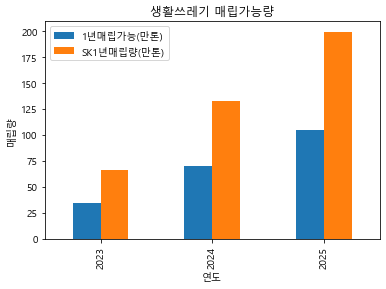

In [399]:
df_f.plot.bar()
plt.title("생활쓰레기 매립가능량")
plt.xlabel("연도")
plt.ylabel("매립량")
plt.show()

### 결론

1. 아쉬움 

 - 도메인 분석과 오류 데이터 발견으로 데이터 비교 분석 및 수정 보완에 너무 많은 시간을 소비
 - 좀 더 다양한 파생변수(비용분석 등)를 통해 분석 하지 못한 점
 - 시각화를 좀 더 다양하게 해보면서 인사이트를 도출하고 싶었는데 그러지 못했음
 - 분석 내용에 대한 정리 및 보고서 작성을 하지 못함 

2. 분석에 따른 의문점

 - 이 문제는 정말 현실적으로 닥쳐 올 문제인데, 도저히 개인이 해결 할 수 있는 문제가 아님
 - 서울과 경기도 각 지자체가 과연 해당 문제에 대한 직접적인 대안 마련을 하고 있는지 의문(특히, 서울)

       - 이유: 매립지 대안 시설의 부지 마련이 경기도에 비해 훨씬 어려울 것으로 보임 

 - 그렇다면 과연 민간업체를 통해 맡기는 게 대안일까? 
 
       - Oh No. 쓰레기 거부사태 및 비용 증가 어떡할꺼야?
       - 공공영역을 민간(소위 민영화)에게 맡겼을 때 비용증가와 서비스질의 감소는 역사가 보증함
 
 - 근본적인 질문: 개인의 생활쓰레기 말고 사업장 폐기물은 어떻게 대응 할 것인가? (매번 개인만 희생해..ㅠ)

3. 대안 모색 검토

 - 서울과 경기도내 소각장, 재활용 시설 가능 부지(지역) 분석(입지, 비용) 및 제안 
